# Regresión Lineal y Regresión Lineal Múltiple
En este notebook se analizará un dataset relacionado con el rendimiento académico de los estudiantes en función de distintas características personales y académicas. El objetivo es determinar si es apropiado aplicar un modelo de **Regresión Lineal Simple** para predecir el rendimiento, o si resulta más conveniente utilizar un modelo de **Regresión Lineal Múltiple** que considere múltiples variables explicativas.
## Librerías utilizadas

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, max_error
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


## Exploración de datos
En esta sección se analizará la estructura general del dataset, junto con las estadísticas descriptivas de sus variables, tales como la *media*, *mediana*, *desviación estándar* y la *distribución* de la variable objetivo **"Performance Index"**.

In [2]:
# Cargo el dataset
df = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")

print("Formato del dataset")
print(df.head())

print("\nEstructura general")
print(df.info())

print("\nEstadísticas básicas")
print(df.describe())

Formato del dataset
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  

Estructura general
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null 

Dentro de nuestro dataset tenemos las características de cada alumno:
* **"Hours Studied"**: Total de horas estudiadas.
* **"Previos Score"**: Puntaje obtenido en el examen anteior.
* **"Extracurricular Activities"**: Booleano que indica si participo en actividades extra curriculares.
* **"Sleep Hours"**: Promedio de horas de sueño.
* **"Sample Question Papers Practiced"**: Cantidad de exámenes de práctica resueltos.
* **"Performance Index"**: Puntaje obtenido en el examen.


Antes de continuar con el análisis, se modificarán los nombres de las columnas para facilitar la lectura y se transformará la columna *"Extracurricular Activities"* de tipo *string* a tipo *int*, reemplazando los valores "Yes" y "No" por 1 y 0, respectivamente.

In [3]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes": 1, "No": 0})
df.columns = ['hours', 'prev_score', 'extra_act', 'sleep', 'sample_papers', 'perf_index']
print("Nuevo formato:")
print(df.head())

Nuevo formato:
   hours  prev_score  extra_act  sleep  sample_papers  perf_index
0      7          99          1      9              1        91.0
1      4          82          0      4              2        65.0
2      8          51          1      7              2        45.0
3      5          52          1      5              2        36.0
4      7          75          0      8              5        66.0


### Distribución de la variable "Performance Index"


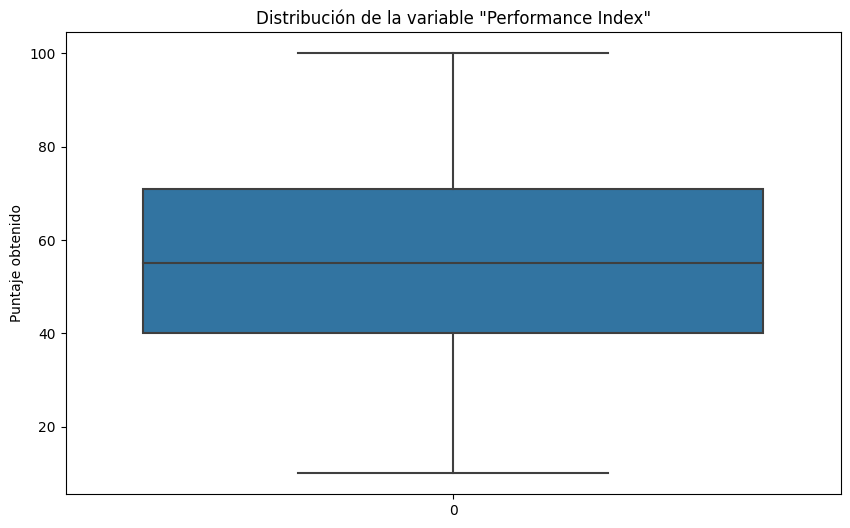

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(df["perf_index"])
plt.ylabel('Puntaje obtenido')
plt.title('Distribución de la variable "Performance Index"')
plt.show()

El boxplot del **Performance Index** muestra que los datos están distribuidos de forma relativamente simétrica, sin presencia de valores atípicos o anómalos que deban ser descartados. También se observa que la mediana se encuentra aproximadamente en el centro del rango intercuartílico (IRQ), lo cual sugiere una simetría en el 50% central de los datos.

La variabilidad dentro del IQR es moderada, lo que sugiere una distribución central controlada. Sin embargo, la desviación estándar general es relativamente alta (19.21), lo que indica una mayor dispersión en los valores extremos, aunque sin presencia de outliers.

Este tipo de distribución es favorable para aplicar modelos de regresión, ya que no se evidencian datos extremos que puedan influir negativamente en el ajuste del modelo.

## Análisis de correlación
### Matriz de correlación
Primero analizaremos la matriz de correlación para identificar la fuerza y dirección de las relaciones lineales entre las variables de nuestro conjunto de datos. Esta matriz nos servirá para identificar las variables que tengan un mayor impacto en nuestra variable objetivo **"Performance Index"** y evaluar si es adecuado aplicar un modelo de Regresión Lineal Multiple.

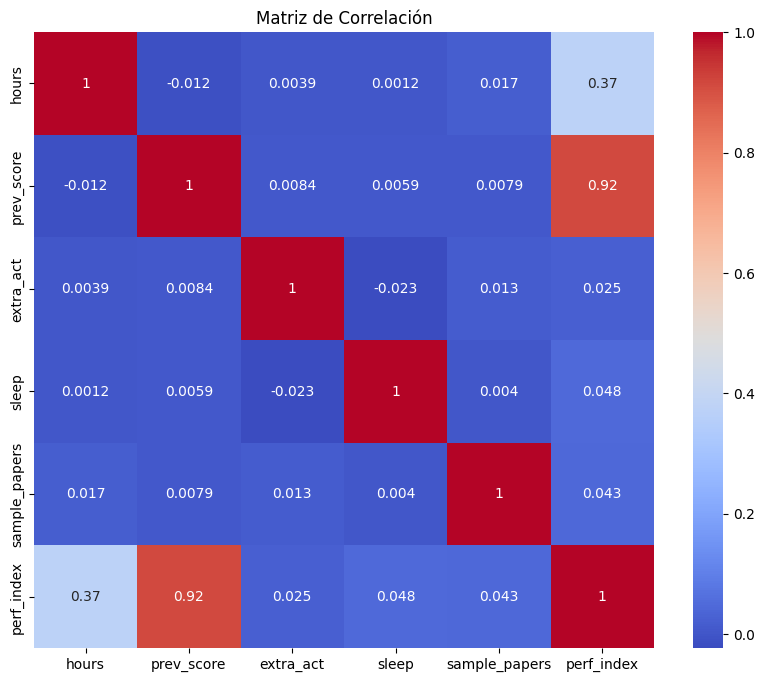

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

Podemos observar una fuerte relación lineal positiva entre **"Previous Scores"** y **"Performance Index"**, lo que indica que los estudiantes con mejores puntajes previos tienden a obtener un mayor rendimiento. Por otro lado, existe una relación moderada entre las **"Hours Studied"** y **"Performance Index"**, sugiriendo que estudiar más contribuye al desempeño, aunque con menor impacto que el rendimiento previo.

A continuación se mostrará graficamente estas 2 relaciones

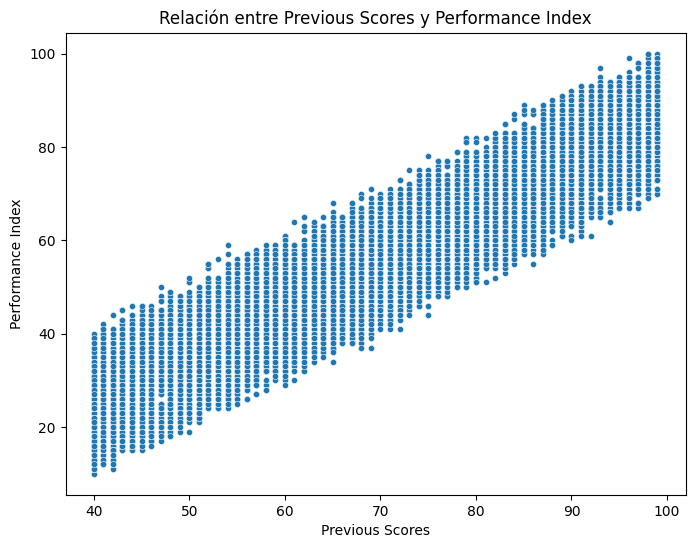

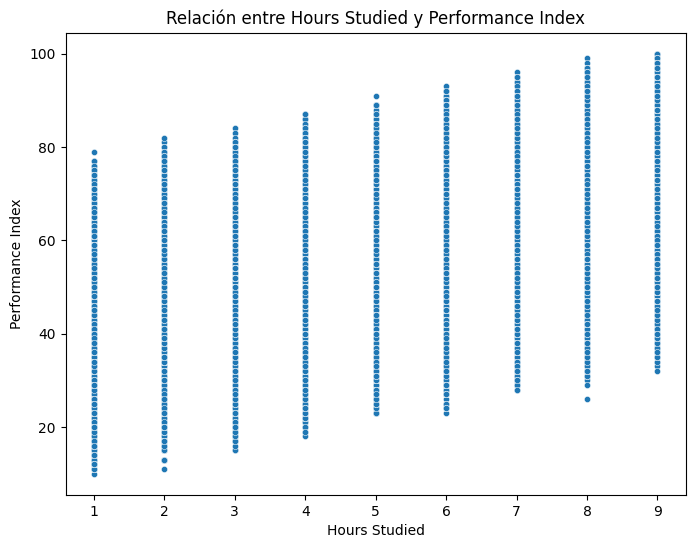

In [6]:
# Gráfico 1: Previous Scores vs Performance Index
plt.figure(figsize=(8, 6))
sns.scatterplot(x="prev_score", y="perf_index",s=20, data=df)
plt.title("Relación entre Previous Scores y Performance Index")
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")
plt.show()

# Gráfico 2: Hours Studied vs Performance Index
plt.figure(figsize=(8, 6))
sns.scatterplot(x="hours", y="perf_index",s=20, data=df)
plt.title("Relación entre Hours Studied y Performance Index")
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.show()

## Regresión lineal
Se seleccionaron como variables predictoras aquellas que mostraron correlaciones significativas con la variable objetivo, las cuales son **"Previous Scores"** y **"Hours Studied"**.

Para cada modelo voy a dividir el conjunto de datos, utilizando el 70% para entrenamiento y el 30% para test

### Modelo 1: usando "Previous Scores"

MSE: 58.593853217062524
RMSE: 7.654662188304754
R²: 0.8416637918193197
Error absoluto máximo: 17.917192770406785


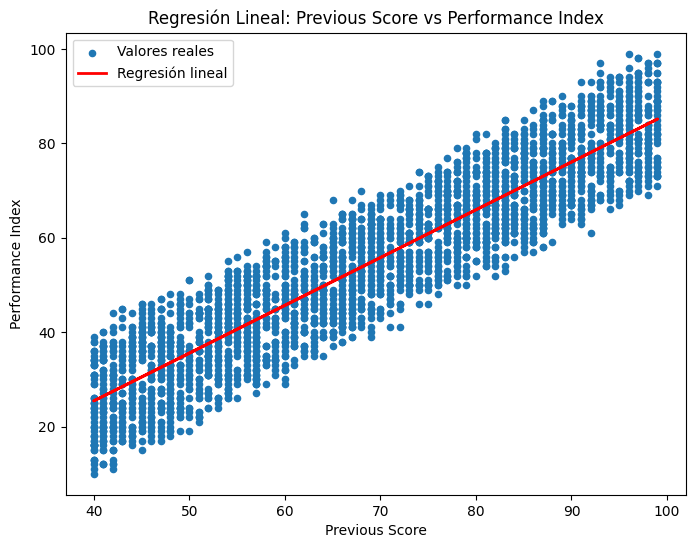

In [7]:
X_prev = df[["prev_score"]]
y = df["perf_index"]

# Divido el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_prev, y, test_size=0.3, random_state=42)

# Entrenamiento del modelo
modelo_prev = LinearRegression()
modelo_prev.fit(X_train, y_train)

# Evaluación del modelo
y_pred = modelo_prev.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared = False))
print("R²:", r2_score(y_test, y_pred))
print(f"Error absoluto máximo: {max_error(y_pred,y_test)}")

plt.figure(figsize=(8, 6))

# Puntos reales
plt.scatter(X_test, y_test,s=20,label='Valores reales')

# Línea de predicción
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regresión lineal')

plt.xlabel('Previous Score')
plt.ylabel('Performance Index')
plt.title('Regresión Lineal: Previous Score vs Performance Index')
plt.legend()

plt.show()

### Modelo 2: usando "Hours Studied"

MSE: 322.10757477547713
RMSE: 17.94735564854826
R²: 0.1295794828974921
Error absoluto máximo: 37.84926863327644


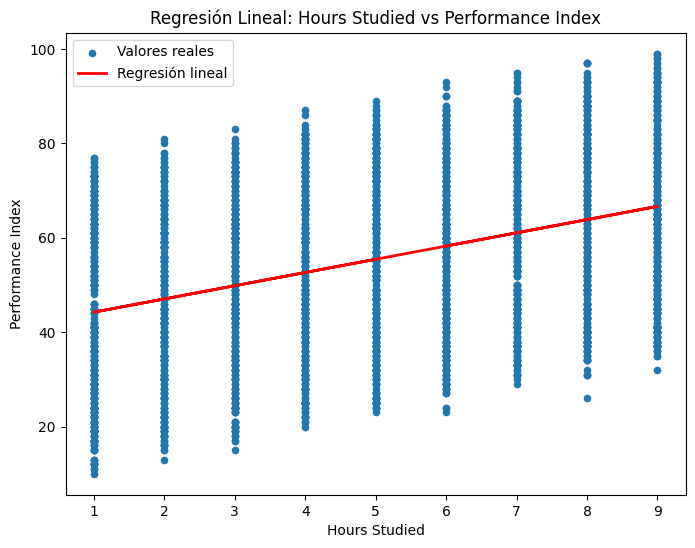

In [8]:
X_hours = df[["hours"]]
y = df["perf_index"]

# Divido el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_hours, y, test_size=0.3, random_state=42)

# Entrenamiento del modelo
modelo_prev = LinearRegression()
modelo_prev.fit(X_train, y_train)

# Evaluación del modelo
y_pred = modelo_prev.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared = False))
print("R²:", r2_score(y_test, y_pred))
print(f"Error absoluto máximo: {max_error(y_pred,y_test)}")

plt.figure(figsize=(8, 6))

# Puntos reales
plt.scatter(X_test, y_test,s=20,label='Valores reales')

# Línea de predicción
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regresión lineal')

plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Regresión Lineal: Hours Studied vs Performance Index')
plt.legend()

plt.show()

### Comparación
Se observa que el modelo 1 comete menos errores en promedio, ya que su RMSE es considerablemente menor (7.65 frente a 17.95). Esto indica que, en general, sus predicciones están más cerca de los valores reales en comparación con el modelo 2.

Además, el coeficiente de determinación R² del modelo 1 es de 0.84, lo que significa que el modelo es capaz de explicar el 84% la variabilidad de nuestra variable objetivo **"Performance Index"**. En cambio, el modelo 2 solo explica el 13% de dicha variabilidad, lo que sugiere que no capta adecuadamente la relación entre las variables.

## Regresión Lineal Múltiple
A continuación se entrenará el modelo usando las variables **"Previous Score"** y **"Hours studied"** para predecir nuestra variable objetivo **"Performance Index"**. Luego se comparará los resultados obtenidos con el **Modelo 1** obtenido por Regresión Lineal.

MSE: 5.201346140631689
RMSE: 2.2806459919574738
R²: 0.9859445764337783
Error absoluto máximo: 9.479828089967036


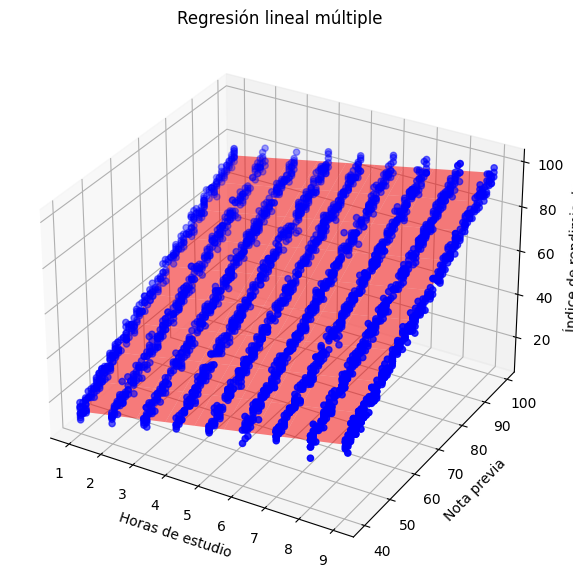

In [9]:
X_hours_prev = df[["hours","prev_score"]]
y = df["perf_index"]

# Divido el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_hours_prev, y, test_size=0.3, random_state=42)

# Entrenamiento del modelo
modelo_prev = LinearRegression()
modelo_prev.fit(X_train, y_train)

# Evaluación del modelo
y_pred = modelo_prev.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared = False))
print("R²:", r2_score(y_test, y_pred))
print(f"Error absoluto máximo: {max_error(y_pred,y_test)}")


# Datos de prueba
x1 = X_test["hours"]
x2 = X_test["prev_score"]
y_real = y_test
#y_pred = modelo_prev.predict(X_test)

# Malla para el plano de regresión
x1_range = np.linspace(x1.min(), x1.max(), 10)
x2_range = np.linspace(x2.min(), x2.max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_grid = modelo_prev.intercept_ + modelo_prev.coef_[0] * x1_grid + modelo_prev.coef_[1] * x2_grid

# Graficar
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Puntos reales
ax.scatter(x1, x2, y_real, c='blue', label="Datos reales")

# Plano de regresión
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5, color='red', label="Plano de regresión")

ax.set_xlabel("Horas de estudio")
ax.set_ylabel("Nota previa")
ax.set_zlabel("Índice de rendimiento")
ax.set_title("Regresión lineal múltiple")
plt.show()